In [2]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
from sklearn.datasets import load_iris
iris=load_iris()

In [4]:
iris_df=pd.DataFrame(iris.data,columns=iris.feature_names)

In [5]:
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [6]:
X=iris_df
y=iris.target

In [7]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=101)

In [8]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler() 

In [9]:
X_train_sc=sc.fit_transform(X_train)
X_test_sc=sc.transform(X_test)


In [10]:
from sklearn.decomposition import PCA
pca=PCA(n_components=3)

In [11]:
X_train_sc_pc=pca.fit_transform(X_train_sc)
X_test_sc_PC=pca.transform(X_test_sc)

In [12]:
pca.explained_variance_ratio_

array([0.725561  , 0.23347479, 0.0367269 ])

In [13]:
pc=['PC1','PC2','PC3']
x_pca_df_train=pd.DataFrame(X_train_sc_pc,columns=pc)
x_pca_df_test=pd.DataFrame(X_test_sc_PC,columns=pc)

<BarContainer object of 3 artists>

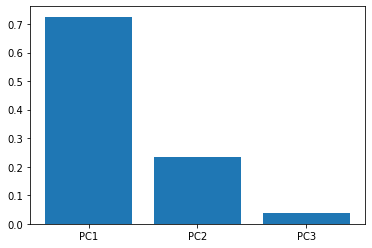

In [14]:
pc=['PC1','PC2','PC3']
plt.bar(pc,pca.explained_variance_ratio_)

In [15]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(2) ### default K=8
knn.fit(x_pca_df_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=2, p=2,
                     weights='uniform')

In [16]:
pre_train=knn.predict(X_train_sc_pc)

In [17]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [18]:
print('accuracy_score')
print(accuracy_score(y_train,pre_train))


accuracy_score
0.9714285714285714


In [19]:
pre_test=knn.predict(X_test_sc_PC)

In [20]:
print('accuracy_score')
print(accuracy_score(y_test,pre_test))


accuracy_score
0.9555555555555556


In [21]:
from sklearn.linear_model import LogisticRegression

In [22]:
lgr=LogisticRegression()

In [23]:
lgr.fit(x_pca_df_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [24]:
y_train_pred=lgr.predict(x_pca_df_train)
len(y_train_pred)

105

In [25]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [26]:
print('accuracy_score')
print(accuracy_score(y_train,y_train_pred.round()))


accuracy_score
0.9047619047619048


In [27]:
print('confusion matrix\n\n',confusion_matrix(y_train,y_train_pred.round()))

confusion matrix

 [[37  0  0]
 [ 0 21  9]
 [ 0  1 37]]


In [28]:
print('\n\nclassification report: \n\n',classification_report(y_train,y_train_pred.round()))




classification report: 

               precision    recall  f1-score   support

           0       1.00      1.00      1.00        37
           1       0.95      0.70      0.81        30
           2       0.80      0.97      0.88        38

    accuracy                           0.90       105
   macro avg       0.92      0.89      0.90       105
weighted avg       0.92      0.90      0.90       105



In [29]:
y_test_pred=lgr.predict(x_pca_df_test)
len(y_test_pred)

45

In [30]:
print('accuracy_score')
print(accuracy_score(y_test,y_test_pred.round()))


accuracy_score
0.8444444444444444


In [31]:
print('confusion matrix\n\n',confusion_matrix(y_train,y_train_pred.round()))

confusion matrix

 [[37  0  0]
 [ 0 21  9]
 [ 0  1 37]]


In [32]:
print('\n\nclassification report: \n\n',classification_report(y_train,y_train_pred.round()))




classification report: 

               precision    recall  f1-score   support

           0       1.00      1.00      1.00        37
           1       0.95      0.70      0.81        30
           2       0.80      0.97      0.88        38

    accuracy                           0.90       105
   macro avg       0.92      0.89      0.90       105
weighted avg       0.92      0.90      0.90       105



In [35]:
from sklearn.cluster import KMeans
cluster_id=[]
K=list(range(1,7))
for i in K:
    km=KMeans(i).fit(X)
    y_km_df_pred=km.fit_predict(X)
    cluster_id.append(km.inertia_)
cluster_id

[681.3706,
 152.34795176035792,
 78.85144142614601,
 57.25600931571815,
 46.44618205128205,
 39.03998724608725]

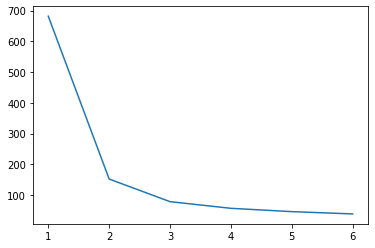

In [36]:
plt.plot(K,cluster_id)

In [39]:
### fitting K-MEAN to the dataset
kmeans=KMeans(n_clusters=3,init='k-means++',random_state=42)
y_kmeans=kmeans.fit_predict(X)
y_kmeans

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

In [40]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')